<a href="https://colab.research.google.com/github/sana-f-shah/Isochrones/blob/main/notebooks/2_cleaning_data_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import pandas as pd

data = '/content/drive/MyDrive/Portfolio/Isochrones/data_versions/combined/data.csv'
df = pd.read_csv(data)

/tmp/ipython-input-4-2551363263.py:4: DtypeWarning: Columns (1,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


In [5]:
df.head()

,OBJECTID,OA21CD,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_date,iso_type,...,centre_Y,node_X,node_Y,stop_X,stop_Y,Shape__Area,Shape__Length,area,SA2011,OA11CD
0,1,E00006573,10,232,1,1,0,900,2022-11-15,from_centroid,...,184958.90,514099.86,184963.01,514010.53,185177.13,2.626818e+06,9754.689079,London West,NaN,NaN
1,2,E00006573,10,232,1,1,0,1800,2022-11-15,from_centroid,...,184958.90,514099.86,184963.01,514010.53,185177.13,2.174000e+07,54769.854440,London West,NaN,NaN
2,3,E00006573,10,232,1,1,0,2700,2022-11-15,from_centroid,...,184958.90,514099.86,184963.01,514010.53,185177.13,8.095427e+07,154013.459001,London West,NaN,NaN
3,4,E00006573,10,232,1,1,0,3600,2022-11-15,from_centroid,...,184958.90,514099.86,184963.01,514010.53,185177.13,2.514075e+08,338138.933613,London West,NaN,NaN
4,5,E00009229,5,224,1,1,0,900,2022-11-15,from_centroid,...,179613.26,523827.91,179613.05,523973.68,179788.29,2.429560e+06,8782.010623,London West,NaN,NaN


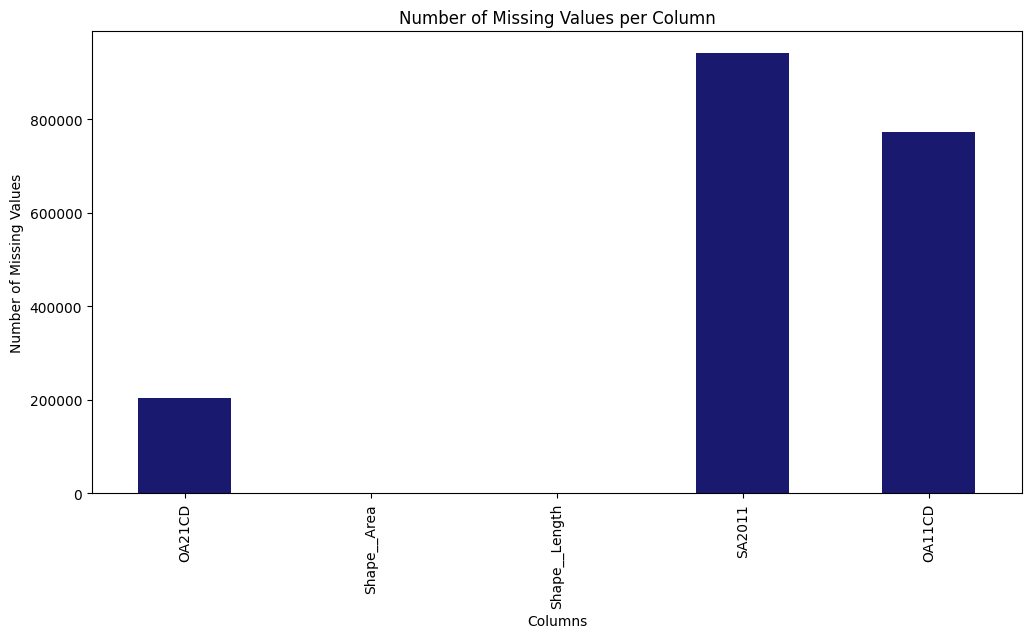

In [6]:
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()

plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].plot(kind='bar', color='#191970')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [7]:
df = df.drop(columns=['OA21CD', 'SA2011', 'OA11CD'])

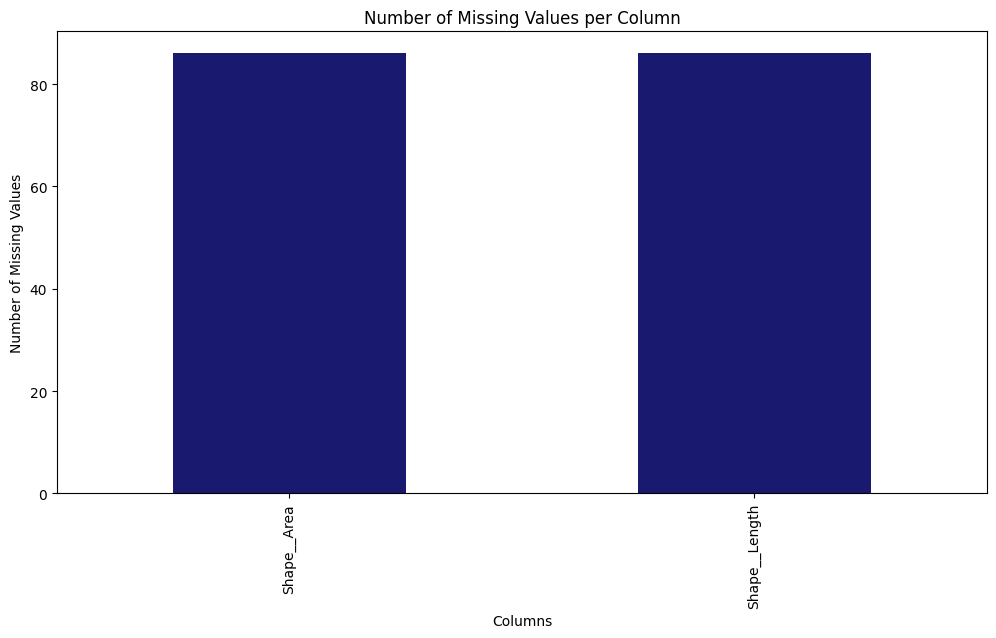

In [8]:
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()

plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].plot(kind='bar', color='#191970')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [9]:
df = df.drop(columns=['Shape__Area', 'Shape__Length'])

In [10]:
rows_with_na = df[df.isna().any(axis=1)]
print(rows_with_na)

Empty DataFrame
Columns: [OBJECTID, node_dist, stop_dist, centre_in, node_in, stop_in, iso_cutoff, iso_date, iso_type, iso_hectar, centre_X, centre_Y, node_X, node_Y, stop_X, stop_Y, area]
Index: []


In [11]:
df.head()

,OBJECTID,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_date,iso_type,iso_hectar,centre_X,centre_Y,node_X,node_Y,stop_X,stop_Y,area
0,1,10,232,1,1,0,900,2022-11-15,from_centroid,680,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West
1,2,10,232,1,1,0,1800,2022-11-15,from_centroid,5617,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West
2,3,10,232,1,1,0,2700,2022-11-15,from_centroid,20919,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West
3,4,10,232,1,1,0,3600,2022-11-15,from_centroid,64943,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West
4,5,5,224,1,1,0,900,2022-11-15,from_centroid,627,523833.14,179613.26,523827.91,179613.05,523973.68,179788.29,London West


In [12]:
df['iso_date'] = pd.to_datetime(df['iso_date'])
df['iso_year'] = df['iso_date'].dt.year
df['iso_month'] = df['iso_date'].dt.month
df['iso_day'] = df['iso_date'].dt.day
df['iso_weekday'] = df['iso_date'].dt.weekday
df.drop(columns=['iso_date'], inplace=True)

In [13]:
df.head()

,OBJECTID,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_type,iso_hectar,centre_X,centre_Y,node_X,node_Y,stop_X,stop_Y,area,iso_year,iso_month,iso_day,iso_weekday
0,1,10,232,1,1,0,900,from_centroid,680,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West,2022,11,15,1
1,2,10,232,1,1,0,1800,from_centroid,5617,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West,2022,11,15,1
2,3,10,232,1,1,0,2700,from_centroid,20919,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West,2022,11,15,1
3,4,10,232,1,1,0,3600,from_centroid,64943,514090.61,184958.90,514099.86,184963.01,514010.53,185177.13,London West,2022,11,15,1
4,5,5,224,1,1,0,900,from_centroid,627,523833.14,179613.26,523827.91,179613.05,523973.68,179788.29,London West,2022,11,15,1


In [14]:
df = pd.get_dummies(df, columns=['iso_type'], drop_first=True)

In [15]:
df.head()

,OBJECTID,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_hectar,centre_X,centre_Y,...,stop_X,stop_Y,area,iso_year,iso_month,iso_day,iso_weekday,iso_type_from_nearest_node,iso_type_from_nearest_stop,iso_type_no_trip_found
0,1,10,232,1,1,0,900,680,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
1,2,10,232,1,1,0,1800,5617,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
2,3,10,232,1,1,0,2700,20919,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
3,4,10,232,1,1,0,3600,64943,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
4,5,5,224,1,1,0,900,627,523833.14,179613.26,...,523973.68,179788.29,London West,2022,11,15,1,False,False,False


In [16]:
print(df.columns)

Index(['OBJECTID', 'node_dist', 'stop_dist', 'centre_in', 'node_in', 'stop_in',
       'iso_cutoff', 'iso_hectar', 'centre_X', 'centre_Y', 'node_X', 'node_Y',
       'stop_X', 'stop_Y', 'area', 'iso_year', 'iso_month', 'iso_day',
       'iso_weekday', 'iso_type_from_nearest_node',
       'iso_type_from_nearest_stop', 'iso_type_no_trip_found'],
      dtype='object')


In [17]:
for col in df.columns:
    print(f"{col}: {df.loc[0, col]}")

OBJECTID: 1
node_dist: 10
stop_dist: 232
centre_in: 1
node_in: 1
stop_in: 0
iso_cutoff: 900
iso_hectar: 680
centre_X: 514090.61
centre_Y: 184958.9
node_X: 514099.86
node_Y: 184963.01
stop_X: 514010.53
stop_Y: 185177.13
area: London West
iso_year: 2022
iso_month: 11
iso_day: 15
iso_weekday: 1
iso_type_from_nearest_node: False
iso_type_from_nearest_stop: False
iso_type_no_trip_found: False


In [18]:
data = '/content/drive/MyDrive/Portfolio/Isochrones/data_versions/combined/data.parquet'

df.to_parquet(data, index=False)
df = pd.read_parquet(data)
df.head()

,OBJECTID,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_hectar,centre_X,centre_Y,...,stop_X,stop_Y,area,iso_year,iso_month,iso_day,iso_weekday,iso_type_from_nearest_node,iso_type_from_nearest_stop,iso_type_no_trip_found
0,1,10,232,1,1,0,900,680,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
1,2,10,232,1,1,0,1800,5617,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
2,3,10,232,1,1,0,2700,20919,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
3,4,10,232,1,1,0,3600,64943,514090.61,184958.90,...,514010.53,185177.13,London West,2022,11,15,1,False,False,False
4,5,5,224,1,1,0,900,627,523833.14,179613.26,...,523973.68,179788.29,London West,2022,11,15,1,False,False,False
